In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import io
import warnings
warnings.filterwarnings('ignore')

In [46]:
df=pd.read_csv('customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [47]:
# 1. Data Manipulation:
#Extract the 5th column and store it in ‘customer_5’
# Extract the 15th column and store it in ‘customer_15’
customer_5 = df.iloc[:, 4]
print(customer_5)
customer_15 = df.iloc[:, 14]
print(customer_15)
#Extract all the male senior citizens whose payment method is electronic check and store the result in ‘senior_male_electronic’
print("***********************************************senior_male_electronic**************************************************************")
senior_male_electronic = df[(df['gender'] == 'Male') & (df['SeniorCitizen'] == 1) & (df['PaymentMethod'] == 'Electronic check')]
print(senior_male_electronic) 
#Extract all those customers whose tenure is greater than 70 months or their monthly charges is more than $100 and store the result in ‘customer_total_tenure’
print("*********************customer_total_tenure************************************************************************************")
customer_total_tenure = df[(df['tenure'] > 70) | (df['MonthlyCharges'] > 100)]
print(customer_total_tenure)
#Extract all the customers whose contract is of two years, payment method is mailed check and the value of churn is ‘Yes’ and store the result in ‘two_mail_yes’
print("*********************TWO_MAIL_YES**********************************************************************************************")
two_mail_yes = df[(df['Contract'] == 'Two Year') & (df['PaymentMethod'] == 'Mailed check') & (df['Churn'] == 'Yes')]
print(two_mail_yes)
#Extract 333 random records from the customer_churndataframe and store the result in ‘customer_333’
print("****************************************333 RANDOM RECORDS customer_333’**************************************************")
customer_333 = df.sample(n=333, random_state=42)
print(customer_333)
#Get the count of different levels from the ‘Churn’ column 
print("**********************************************CHURN_COUNTS*****************************************************************")
churn_counts = df['Churn'].value_counts()
print(churn_counts)

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: Dependents, Length: 7043, dtype: object
0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040     No
7041     No
7042    Yes
Name: StreamingMovies, Length: 7043, dtype: object
***********************************************senior_male_electronic**************************************************************
      customerID gender  SeniorCitizen Partner Dependents  tenure  \
20    8779-QRDMV   Male              1      No         No       1   
55    1658-BYGOY   Male              1      No         No      18   
57    5067-XJQFU   Male              1     Yes        Yes      66   
78    0191-ZHSKZ   Male              1      No         No      30   
91    2424-WVHPL   Male              1      No         No       1   
...          ...    ...            ...     ...        ...     ...   
6837  6229-LSCKB   Male 

 2. Data Visualization:
 Build a bar-plot for the ’InternetService’ column:


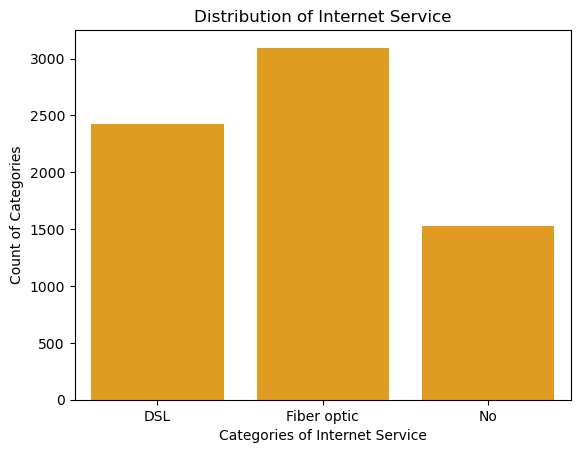

Build a histogram for the ‘tenure’ column:


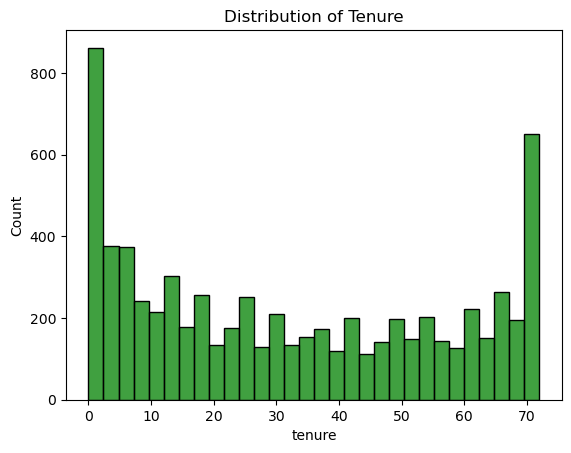

Build a scatter-plot between MonthlyCharges and tenure.


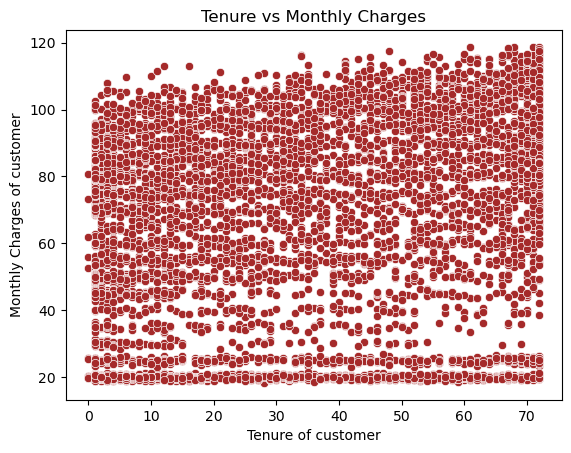

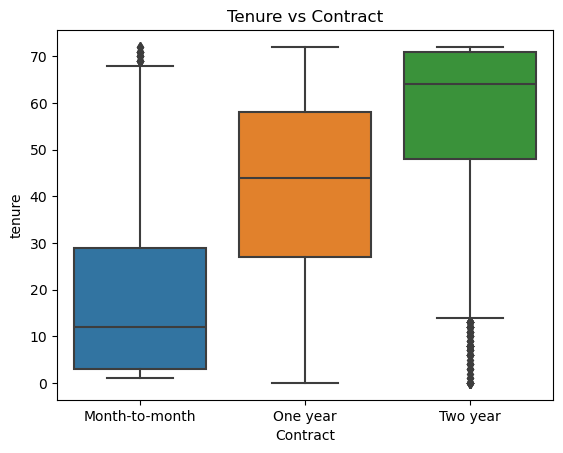

In [48]:
print(" 2. Data Visualization:")
###############################3
print(" Build a bar-plot for the ’InternetService’ column:")
# a. Set x-axis label to ‘Categories of Internet Service’
 #b. Set y-axis label to ‘Count of Categories’
 #c. Set the title of plot to be ‘Distribution of Internet Service’
# d. Set the color of the bars to be ‘orange’ 
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='InternetService', data=df, color='orange')
plt.title('Distribution of Internet Service')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.show()
####################################
print("Build a histogram for the ‘tenure’ column:")
''' a. Set the number of bins to be 30
 b. Set the color of the bins to be ‘green’
 c. Assign the title ‘Distribution of tenure’'''
sns.histplot(data=df, x='tenure', bins=30, color='green')
plt.title('Distribution of Tenure')
plt.show()
############################################
print("Build a scatter-plot between MonthlyCharges and tenure.") 
''' a. Assign the points a color of ‘brown’
 b. Set the x-axis label to ‘Tenure of customer’
 c. Set the y-axis label to ‘Monthly Charges of customer’
 d. Set the title to ‘Tenure vs Monthly Charges’
 e. Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the
 y-axis &
 f. ‘Contract’ on the x-axis.'''
sns.scatterplot(x='tenure', y='MonthlyCharges', data=df, color='brown')
plt.title('Tenure vs Monthly Charges')
plt.xlabel('Tenure of customer')
plt.ylabel('Monthly Charges of customer')
plt.show()
sns.boxplot(x='Contract', y='tenure', data=df)
plt.title('Tenure vs Contract')
plt.show()

In [49]:
print("3.Linear Regression:")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X = df[['tenure']]
y = df['MonthlyCharges']
# a. Divide the dataset into train and test sets in 70:30 ratio.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)
print(X_train, X_test, y_train, y_test)
# b. Build the model on train set and predict the values on test set
model = LinearRegression()
model.fit(X_train, y_train)
# c. After predicting the values, find the root mean square error
#d. Find out the error in prediction & store the result in ‘error’
# e. Find the root mean square error
y_pred = model.predict(X_test) 
error = mean_squared_error(y_test, y_pred)
print("Root Mean Squared Error:", error)


3.Linear Regression:
      tenure
1695      54
1095       1
3889      13
3667      24
2902       6
...      ...
3772       1
5191      23
5226      12
5390      12
860       26

[4930 rows x 1 columns]       tenure
185        1
2715      41
3825      52
1807       1
132       67
...      ...
5522       1
6377       1
5500      60
2392      20
6705      22

[2113 rows x 1 columns] 1695    70.70
1095    80.55
3889    19.30
3667    96.55
2902    74.10
        ...  
3772    95.00
5191    91.10
5226    21.15
5390    99.45
860     19.80
Name: MonthlyCharges, Length: 4930, dtype: float64 185     24.80
2715    25.25
3825    19.35
1807    76.35
132     50.55
        ...  
5522    70.15
6377    44.65
5500    60.50
2392    90.70
6705    51.10
Name: MonthlyCharges, Length: 2113, dtype: float64
Root Mean Squared Error: 845.6091871095867


In [50]:
print("4. Logistic Regression:")
#● Build a simple logistic regression model where dependent variable is ‘Churn’ and independent variable is ‘MonthlyCharges’
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
X = df[['MonthlyCharges']]
y = df['Churn']
print("*********************a. Divide the dataset in 65:35 ratio**************************")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)
print(X_train, X_test, y_train, y_test)
print("*******************Build the model on train set and predict the values on test set******************")
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)
print("************************************c. Build the confusion matrix and get the accuracy score********************************************")
confusion_mat = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)
print("Accuracy:", accuracy)
print("***************************Build a multiple logistic regression model where dependent variable is ‘Churn’ and independent variables are ‘tenure’ and ‘MonthlyCharges’*******************************")
X = df[['tenure', 'MonthlyCharges']]
y = df['Churn']
print("**********************************e. Divide the dataset in 80:20 ratio*******************************")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("************************************************f. Build the model on train set and predict the values on test set********************************")
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)
print("******************************8g. Build the confusion matrix and get the accuracy score************************************************************")
confusion_mat = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)
print("Accuracy:", accuracy)

4. Logistic Regression:
*********************a. Divide the dataset in 65:35 ratio**************************
      MonthlyCharges
3143           72.80
192            19.75
6251           19.25
1126           74.65
2689          116.75
...              ...
3772           95.00
5191           91.10
5226           21.15
5390           99.45
860            19.80

[4577 rows x 1 columns]       MonthlyCharges
185            24.80
2715           25.25
3825           19.35
1807           76.35
132            50.55
...              ...
5940           85.85
1788           19.60
5101          106.65
6549           56.25
528            19.60

[2466 rows x 1 columns] 3143     No
192      No
6251     No
1126    Yes
2689     No
       ... 
3772    Yes
5191     No
5226     No
5390    Yes
860      No
Name: Churn, Length: 4577, dtype: object 185     Yes
2715     No
3825     No
1807    Yes
132      No
       ... 
5940     No
1788     No
5101     No
6549    Yes
528      No
Name: Churn, Length: 2466, dtype:

In [51]:
print("5.Decision Tree")
#● Build a decision tree model where dependent variable is ‘Churn’ and independent variable is ‘tenure’:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
X = df[['tenure']]
y = df['Churn']
print("************************************************** a. Divide the dataset in 80:20 ratio***********************************************")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train, X_test, y_train, y_test)
print("***************************************************b. Build the model on train set and predict the values on test set***********************************")
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("**************************************************c.Build the confusion matrix and calculate the accuracy******************************************")
confusion_mat = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)
print("Accuracy:", accuracy)

5.Decision Tree
************************************************** a. Divide the dataset in 80:20 ratio***********************************************
      tenure
2142      21
1623      54
6074       1
1362       4
6754       0
...      ...
3772       1
5191      23
5226      12
5390      12
860       26

[5634 rows x 1 columns]       tenure
185        1
2715      41
3825      52
1807       1
132       67
...      ...
6366      64
315       51
2439      17
5002      69
1161       1

[1409 rows x 1 columns] 2142     No
1623     No
6074    Yes
1362    Yes
6754     No
       ... 
3772    Yes
5191     No
5226     No
5390    Yes
860      No
Name: Churn, Length: 5634, dtype: object 185     Yes
2715     No
3825     No
1807    Yes
132      No
       ... 
6366     No
315      No
2439     No
5002     No
1161    Yes
Name: Churn, Length: 1409, dtype: object
***************************************************b. Build the model on train set and predict the values on test set************************

In [52]:
# 6. Random Forest:
''' ● Build a Random Forest model where dependent variable is ‘Churn’ and
 independent variables are ‘tenure’ and ‘MonthlyCharges’:'''
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
X = df[['tenure', 'MonthlyCharges']]
y = df['Churn']
print("********************************a. Divide the dataset in 70:30 ratio**********************************************")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train, X_test, y_train, y_test)
print("********************************* b. Build the model on train set and predict the values on test set*****************************")
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(y_pred)
print("*******************************************c.Build the confusion matrix and calculate the accuracy*****************************************************")
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


********************************a. Divide the dataset in 70:30 ratio**********************************************
      tenure  MonthlyCharges
1695      54           70.70
1095       1           80.55
3889      13           19.30
3667      24           96.55
2902       6           74.10
...      ...             ...
3772       1           95.00
5191      23           91.10
5226      12           21.15
5390      12           99.45
860       26           19.80

[4930 rows x 2 columns]       tenure  MonthlyCharges
185        1           24.80
2715      41           25.25
3825      52           19.35
1807       1           76.35
132       67           50.55
...      ...             ...
5522       1           70.15
6377       1           44.65
5500      60           60.50
2392      20           90.70
6705      22           51.10

[2113 rows x 2 columns] 1695     No
1095     No
3889     No
3667     No
2902     No
       ... 
3772    Yes
5191     No
5226     No
5390    Yes
860      No
Name: C